In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
df = pd.read_csv(r"cars_dataset.csv")


In [19]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,car
0,vhigh,vhigh,two,two,small,low,unacc
1,vhigh,vhigh,two,two,small,med,unacc
2,vhigh,vhigh,two,two,small,high,unacc
3,vhigh,vhigh,two,two,med,low,unacc
4,vhigh,vhigh,two,two,med,med,unacc


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   car       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [21]:
df["buying"].unique(),



(array(['vhigh', 'high', 'med', 'low'], dtype=object),)

In [22]:
df["maint"].unique(),


(array(['vhigh', 'high', 'med', 'low'], dtype=object),)

In [23]:
df["doors"].unique(),


(array(['two', 'three', 'four', '5more'], dtype=object),)

In [24]:
df["persons"].unique(),


(array(['two', 'four', 'more'], dtype=object),)

In [25]:
df["lug_boot"].unique(),


(array(['small', 'med', 'big'], dtype=object),)

In [26]:
df["safety"].unique(),


(array(['low', 'med', 'high'], dtype=object),)

In [27]:
df["car"].unique()


array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [28]:
# Converting string values to int using LabelEncoder

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
label = LabelEncoder()

In [34]:
df["buying"] = label.fit_transform(df["buying"])
df["maint"] = label.fit_transform(df["maint"])
df["doors"] = label.fit_transform(df["doors"])
df["lug_boot"] = label.fit_transform(df["lug_boot"])
df["persons"] = label.fit_transform(df["persons"])
df["safety"] = label.fit_transform(df["safety"])
df["car"] = label.fit_transform(df["car"])



In [35]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,car
0,3,3,3,2,2,1,2
1,3,3,3,2,2,2,2
2,3,3,3,2,2,0,2
3,3,3,3,2,1,1,2
4,3,3,3,2,1,2,2


In [ ]:
df.info() # All are int values now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   persons   1728 non-null   int64
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
 6   car       1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


[Text(0, 0, '384'), Text(0, 0, '69'), Text(0, 0, '1210'), Text(0, 0, '65')]

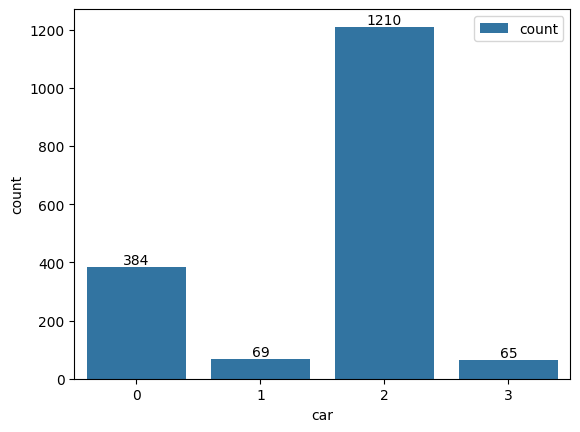

In [46]:
ax = sns.countplot(x = df["car"],data=df, label = "count")
ax.bar_label(ax.containers[0], label_type='edge')


<Axes: >

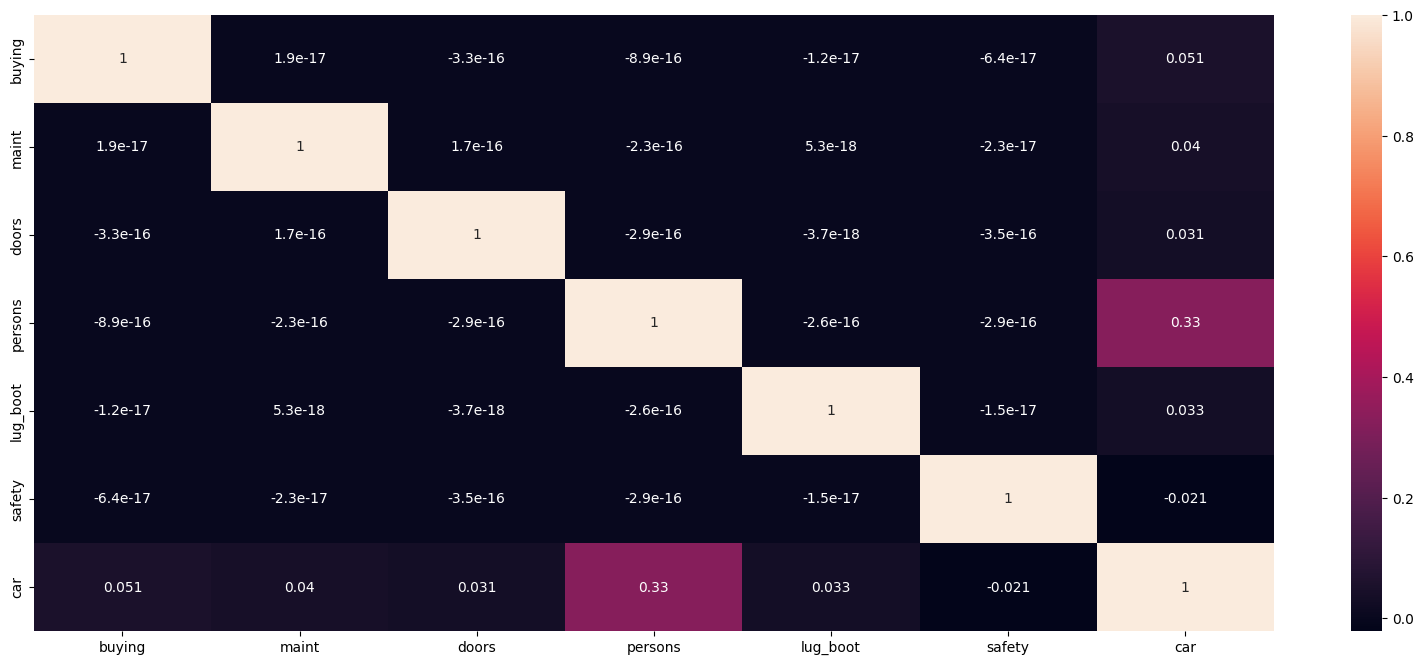

In [48]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True)


In [49]:
# Model Training


In [50]:
y = df["car"]
X = df.drop(["car"],axis = 1)

In [51]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,3,2,2,1
1,3,3,3,2,2,2
2,3,3,3,2,2,0
3,3,3,3,2,1,1
4,3,3,3,2,1,2


In [52]:
y

0       2
1       2
2       2
3       2
4       2
       ..
1723    1
1724    3
1725    2
1726    1
1727    3
Name: car, Length: 1728, dtype: int64

In [53]:
# Standardizing the data


In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [57]:
X_scaled.min(),X_scaled.max()

(np.float64(-1.3416407864998738), np.float64(1.3416407864998738))

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [60]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1209, 6), (519, 6), (1209,), (519,))

In [61]:
from sklearn import svm

In [63]:
clf = svm.LinearSVC()
clf.fit(X_train,y_train)

LinearSVC()

In [64]:
y_predict = clf.predict(X_test)

In [70]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report

In [68]:
cm = confusion_matrix(y_test,y_predict)
print(cm)

[[ 18   0 101   0]
 [  1   0  17   0]
 [ 15   0 345   0]
 [  9   0  13   0]]


In [ ]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [71]:
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       0.42      0.15      0.22       119
           1       0.00      0.00      0.00        18
           2       0.72      0.96      0.83       360
           3       0.00      0.00      0.00        22

    accuracy                           0.70       519
   macro avg       0.29      0.28      0.26       519
weighted avg       0.60      0.70      0.62       519



c:\Users\garvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\garvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\garvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [72]:
from sklearn.model_selection import GridSearchCV,cross_val_score


In [92]:
params = {"C": [0.1,1,10], "kernel":['linear', 'poly','sigmoid','rbf']}

In [93]:
model = svm.SVC()
grid = GridSearchCV(model,params,cv=5)
grid.fit(X_train,y_train)
y_predict = grid.predict(X_test)
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       119
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00       360
           3       1.00      1.00      1.00        22

    accuracy                           1.00       519
   macro avg       1.00      1.00      1.00       519
weighted avg       1.00      1.00      1.00       519



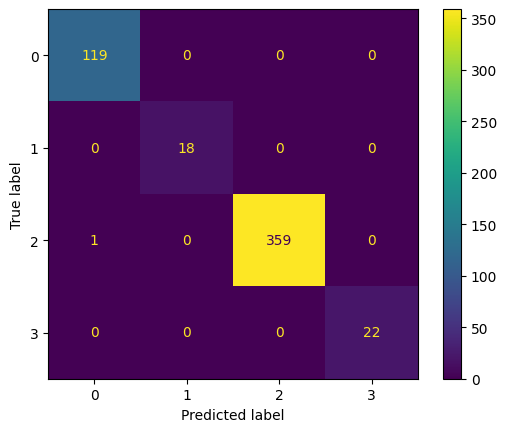

In [97]:
cm = confusion_matrix(y_test,y_predict)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [98]:
grid.best_estimator_

SVC(C=10)

In [99]:
grid.best_params_

{'C': 10, 'kernel': 'rbf'}

In [ ]:
# Hence the SVM model with rbf kernel and C value 10 gives 100 % accurate results